In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# displays numerical values upto 2nd decimal.
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv(r"Data/data.csv")
df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [23]:
# 10 & 90 percentiles helps to determine if there are outliers. 
df.describe(percentiles=[.10,.25,.50,.90])

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.00,14997.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7500.00,0.61,0.72,3.80,201.05,3.50,0.14,0.02,0.24
std,4329.98,0.25,0.17,1.23,49.94,1.46,0.35,0.14,0.43
min,1.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
10%,1500.80,0.21,0.49,2.00,137.00,2.00,0.00,0.00,0.00
25%,3750.50,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,7500.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
90%,13499.20,0.92,0.95,5.00,267.00,5.00,1.00,0.00,1.00
max,14999.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [24]:
# Null Value Percentage
df.isnull().sum()/df.shape[0]*100

empid                   0.00
satisfaction_level      0.01
last_evaluation         0.00
number_project          0.00
average_montly_hours    0.00
time_spend_company      0.00
Work_accident           0.00
promotion_last_5years   0.00
salary                  0.00
left                    0.00
dtype: float64

# Categorical-Numerical features seperation 
Segregating categorical and numerical for studying distribution 

In [25]:
isnull_sum = df.isnull().sum()

num_vars = df.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

cat_vars = df.select_dtypes(include=["object"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]

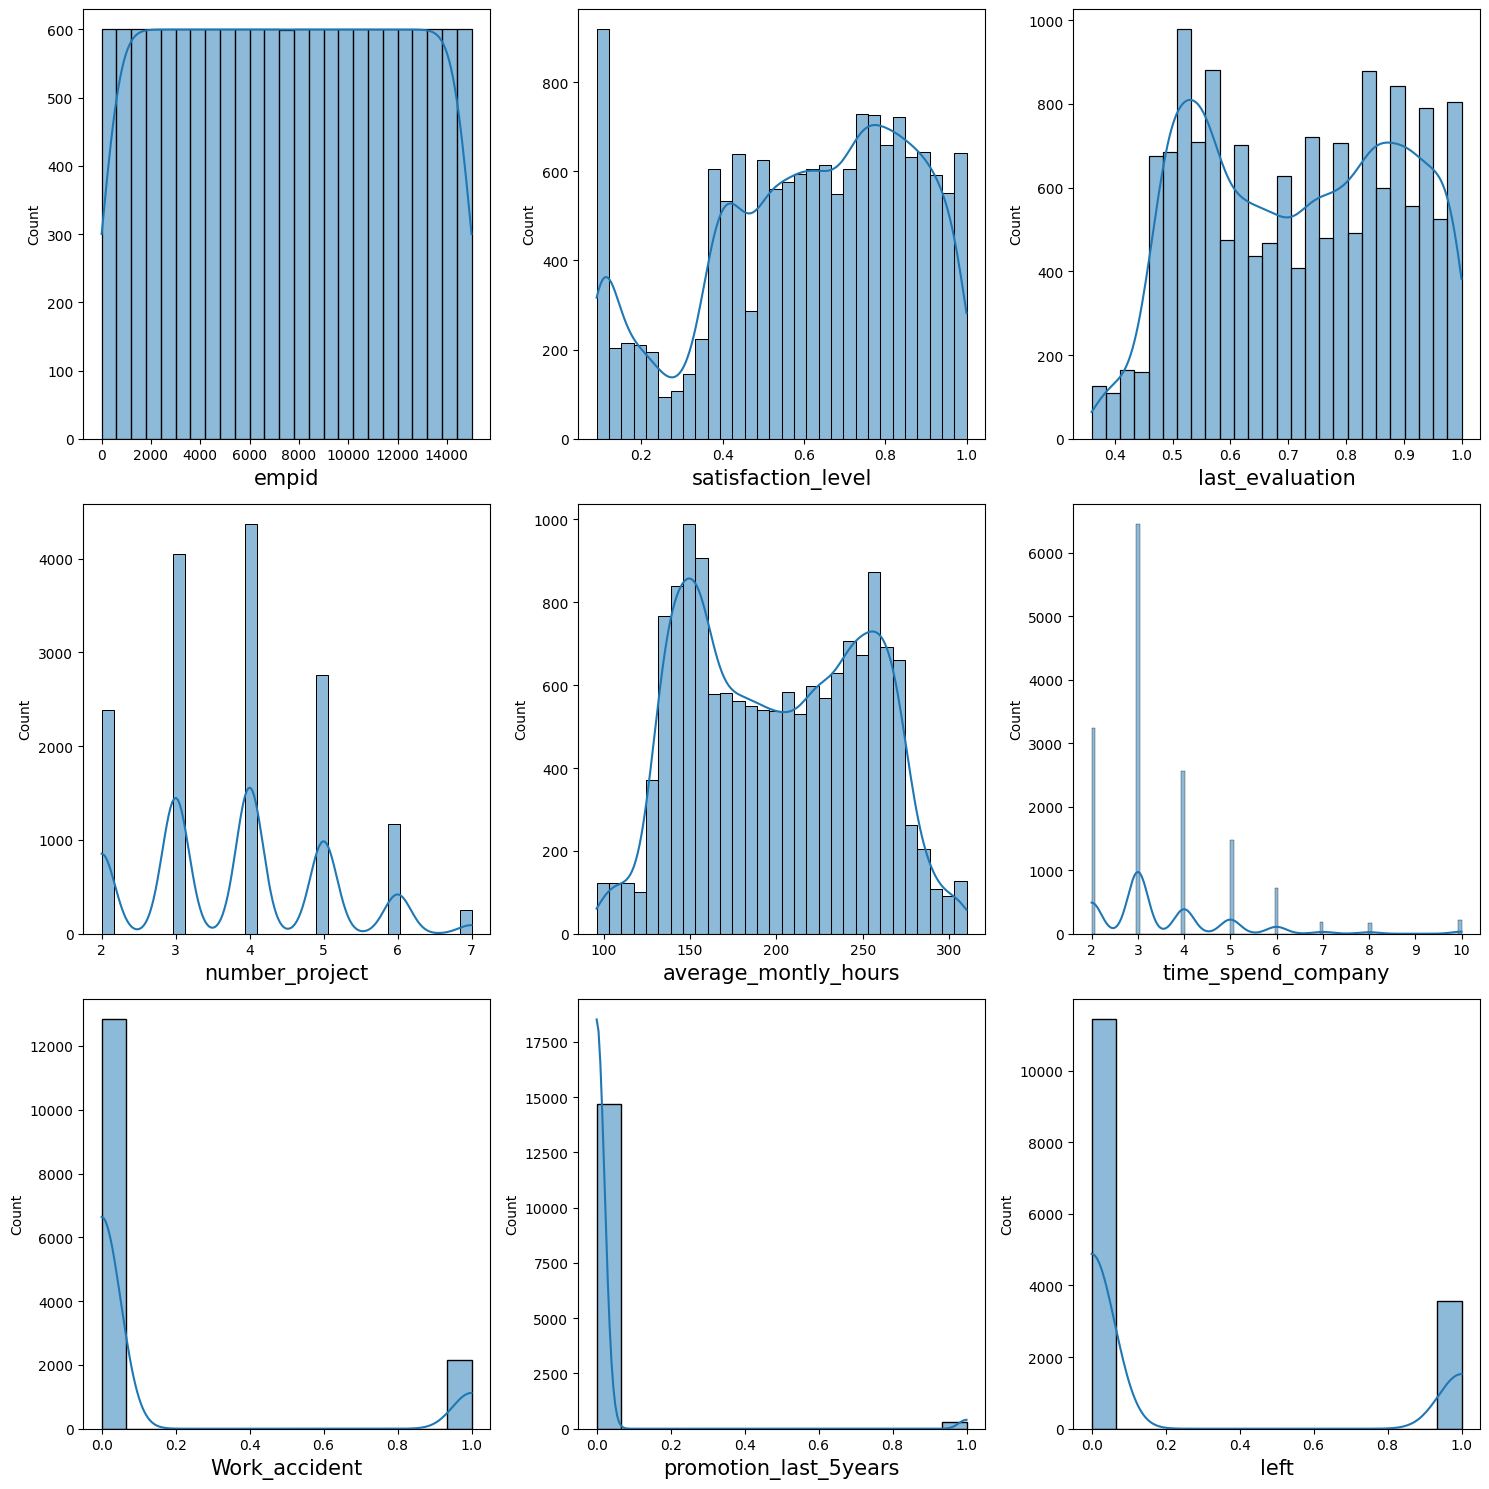

In [55]:
# Numerical features distribution
plt.figure(figsize=(15,15),dpi=100, facecolor='white')
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(df[column],kde=True)
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [28]:
# Seperating discrete value features & continous value features. But in this project, wehave only one categorical feature.
# n
# dis_val_feat = [column for column in num_vars if len(comp_dataset[column].unique())<=n] 
# cont_val_feat = [column for column in num_vars if len(comp_dataset[column].unique())>n]

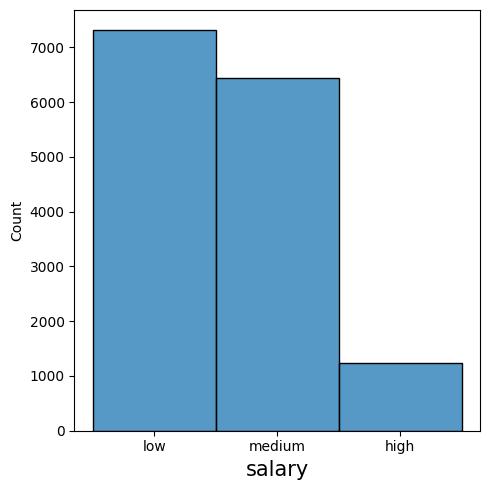

In [54]:
plt.figure(figsize=(5,5),dpi=100, facecolor='white')
plotnumber = 1
for column in cat_vars:
    ax = plt.subplot(1,1,plotnumber)
    sns.histplot(df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

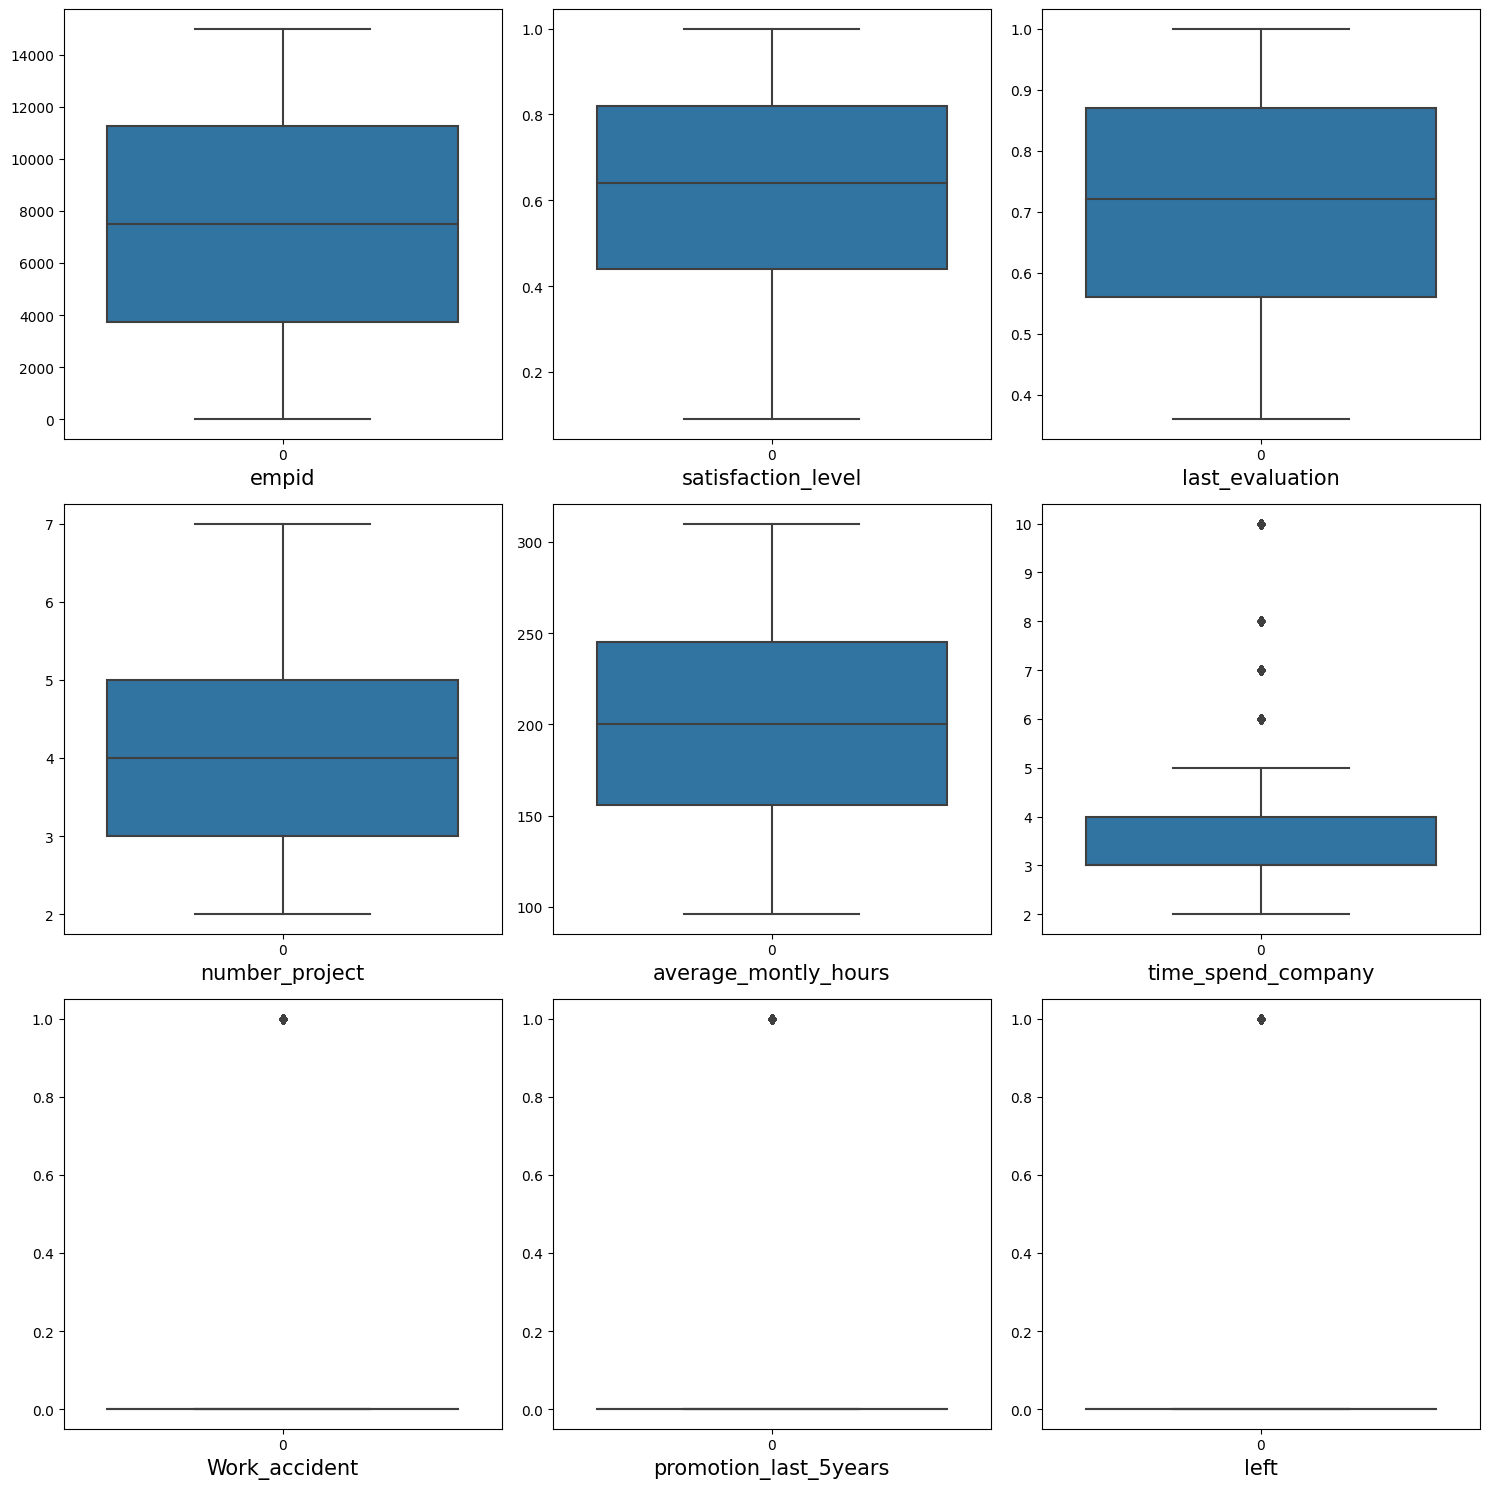

In [53]:
# PLotting Box-plot for numerical features for detecting outliers
plt.figure(figsize=(15,15),dpi=100, facecolor='white')
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(data=df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

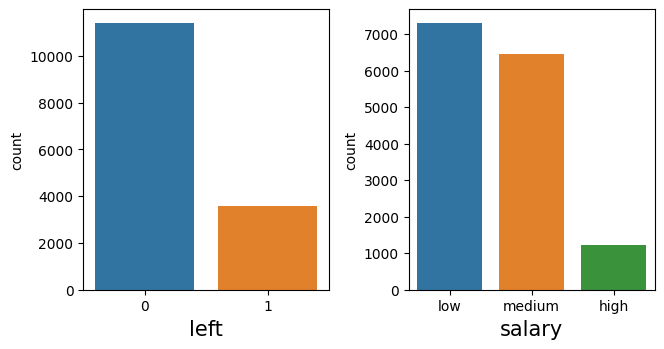

In [52]:
# Plotting countplot for certain features
features = ['left','salary']
plt.figure(figsize=(10,10),dpi=100, facecolor='white')
plotnumber = 1

for f in features:
    ax = plt.subplot(3,3,plotnumber)
    sns.countplot(x=f, data=df)
    plt.xlabel(f,fontsize=15)
    plotnumber+=1
plt.tight_layout()

ValueError: Image size of 7499500x500 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000001DAEF51E520> (for post_execute):


ValueError: Image size of 7499500x500 pixels is too large. It must be less than 2^16 in each direction.

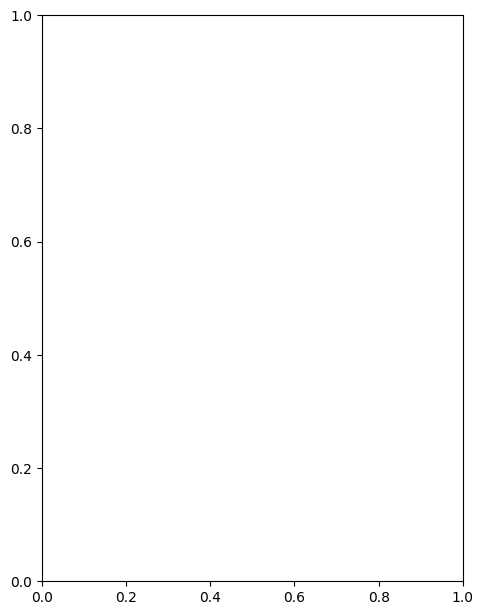

ValueError: Image size of 7499500x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 7.4995e+06x500 with 14999 Axes>

In [56]:
# # Plotting catplot wrt to 'left' column
# plt.figure(figsize=(25,25),dpi=100, facecolor='white')
# plotnumber = 1

# for feature in df.columns:
#     ax = plt.subplot(3,4,plotnumber)
#     sns.catplot(x='left',col=feature,data=df,kind='count')
#     plt.xlabel(feature,fontsize=15)
#     plotnumber+=1
# plt.tight_layout()

In [ ]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [ ]:
## Checking for pairplot
sns.pairplot(df)